# Car Price Prediction Implementation


In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('/content/car data.csv')

In [11]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df.shape

(301, 9)

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  ...  Seller_Type  Transmission Owner
0       ritz  2014           3.35  ...       Dealer        Manual     0
1        sx4  2013           4.75  ...       Dealer        Manual     0
2       ciaz  2017           7.25  ...       Dealer        Manual     0
3    wagon r  2011           2.85  ...       Dealer        Manual     0
4      swift  2014           4.60  ...       Dealer        Manual     0
..       ...   ...            ...  ...          ...           ...   ...
296     city  2016           9.50  ...       Dealer        Manual     0
297     brio  2015           4.00  ...       Dealer        Manual     0
298     city  2009           3.35  ...       Dealer        Manual     0
299     city  2017          11.50  ...       Dealer        Manual     0
300     brio  2016           5.30  ...       Dealer        Manual     0

[301 rows x 9 columns]>

In [16]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [17]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
df['Fuel_Type'].nunique()

3

In [19]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [20]:
df['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [21]:
df = df.drop('Car_Name',axis=1)

In [22]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
#Feature Engineering
df['current_year'] = 2021
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [24]:
df['no_year'] = df['current_year']-df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [25]:
final_df = df.drop('Year',axis=1)
final_df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021,4


In [26]:
final_df = pd.get_dummies(df,drop_first=True)
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,2021,7,0,1,0,1
1,2013,4.75,9.54,43000,0,2021,8,1,0,0,1
2,2017,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2011,2.85,4.15,5200,0,2021,10,0,1,0,1
4,2014,4.60,6.87,42450,0,2021,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2021,5,1,0,0,1
297,2015,4.00,5.90,60000,0,2021,6,0,1,0,1
298,2009,3.35,11.00,87934,0,2021,12,0,1,0,1
299,2017,11.50,12.50,9000,0,2021,4,1,0,0,1


In [28]:
final_df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,NaN,-1.000000,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,NaN,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,NaN,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104,-0.053469,0.055687,0.124269,-0.050316
current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_year,-1.000000,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,NaN,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,NaN,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,NaN,0.039896,-0.350467,0.358321,1.000000,0.063240


In [29]:
final_df.drop('current_year',axis=1,inplace=True)
final_df.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-1.000000,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-1.000000,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


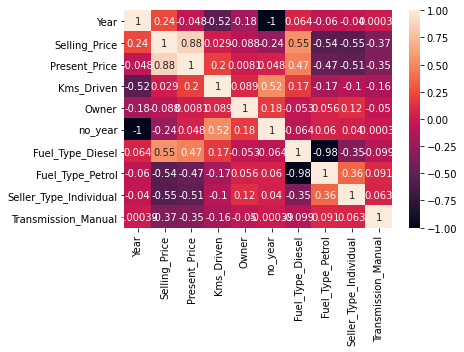

In [30]:
import seaborn as sns
corr = final_df.corr()
sns.heatmap(corr,annot=True)

In [97]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [98]:
X.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [99]:
y.head

<bound method NDFrame.head of 0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64>

# Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
y_pred_df = lr.predict(X_test)
y_pred_df

array([2015., 2014., 2011., 2015., ..., 2004., 2007., 2009., 2017.])

In [138]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [101]:
final_df.to_csv('test.csv')

In [104]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Feature **Importance**

In [107]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

[2.118851e-03 2.344605e-04 2.289183e-02 9.562797e-04 9.727784e-01 5.132464e-04 2.076129e-04 1.225831e-04 1.767732e-04]


In [108]:
feat_imp = pd.Series(model.feature_importances_,index=X.columns)
feat_imp

Selling_Price             0.002119
Present_Price             0.000234
Kms_Driven                0.022892
Owner                     0.000956
no_year                   0.972778
Fuel_Type_Diesel          0.000513
Fuel_Type_Petrol          0.000208
Seller_Type_Individual    0.000123
Transmission_Manual       0.000177
dtype: float64

# Hyper Parameter Tuning

In [109]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1500,num=15)]
n_estimators

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500]

In [120]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100,stop=1500,num=15)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_sample_split = [2,5,10,15,100]
min_sample_leaf = [1,2,5,10]

In [111]:
# Creating the random grid
random_grid = {'n_estimators':n_estimators,'max_features':max_features,
               'max_depth': max_depth,'min_sample_split':min_sample_split,'min_sample_leaf':min_sample_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_sample_split': [2, 5, 10, 15, 100], 'min_sample_leaf': [1, 2, 5, 10]}


In [112]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=8)

In [114]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [140]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [136]:
help('modules')


Please wait a moment while I gather a list of all available modules...

Cython              colorlover          kaggle              random
IPython             colorsys            kapre               re
OpenGL              community           keras               readline
PIL                 compileall          keras_preprocessing regex
ScreenResolution    concurrent          keyword             reprlib
__future__          configparser        kiwisolver          requests
_abc                contextlib          korean_lunar_calendar requests_oauthlib
_ast                contextlib2         lib2to3             resampy
_asyncio            contextvars         libfuturize         resource
_bisect             convertdate         libpasteurize       retrying
_blake2             copy                librosa             rlcompleter
_bootlocale         copyreg             lightgbm            rmagic
_bz2                coverage            linecache           rpy2
_cffi_backend       coveralls      

In [70]:
rf.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Saving the model

In [75]:
import pickle 
file = open('car_price_model.pkl','wb')
pickle.dump(rf,file)
pickle

Exception ignored in: <_io.FileIO name='car_price_model.pkl' mode='wb' closefd=True>


<module 'pickle' from '/usr/lib/python3.7/pickle.py'>

In [76]:
rf.predict(X_train)

array([2016., 2015., 2014., 2013., ..., 2015., 2012., 2014., 2016.])

In [118]:
rf.predict(X_test)


array([2015.  , 2014.  , 2011.  , 2015.  , ..., 2005.35, 2007.6 , 2009.03, 2017.  ])

In [142]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)
y_pred_df = rf.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_df))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_df))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_df)))
R2_Score = metrics.r2_score(y_test,y_pred_df) # r2_score
print('R2_Score:',R2_Score)

MAE: 0.025394736842100116
MAE: 0.025394736842100116
RMSE: 0.1474921942626802
R2_Score: 0.997279343495583


# Final Predictions

In [143]:
y_pred=rf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
print(y_pred)


MAE: 0.025394736842100116
MSE: 0.021753947368420193
RMSE: 0.1474921942626802
R2: 0.997279343495583
[2009.99 2009.99 2014.   2014.   ... 2015.   2015.   2014.   2015.  ]


Saving the model

In [144]:
import pickle
file = open('car_price_model.pkl','wb')
pickle.dump(rf_random,file)

Exception ignored in: <_io.FileIO name='car_price_model.pkl' mode='wb' closefd=True>
